# Preprocessing and Feature Creation

In this notebook we import the data, preprocess the data and create features for supervised and unsupervised cross-lingual-information retrieval models.

## I. Import Data

In this section we import the English and German europarl datasets and combine them into a parallel sentence translation dataframe.

In [1]:
from src.data.preprocessing_class import PreprocessingEuroParl

In [2]:
parallel_sentences = PreprocessingEuroParl(sentence_data_source='../data/external/europarl-v7.de-en.en',
                 sentence_data_target='../data/external/europarl-v7.de-en.de',number_datapoints=10)

In [3]:
parallel_sentences.dataframe

,text_source,text_target
656616,We all ought to give this our backing.,Hier sollten wir alle Unterstützung geben.
1565402,"Mr President, I want to say that we agree to t...","Herr Präsident, wir stimmen dem Antrag der Spr..."
1030556,The Mediterranean has been ever present in our...,"Der Mittelmeerraum war bei unseren Fragen, Änd..."
434889,It will interest colleagues from this committe...,Es wird die Kollegen dieses Ausschusses intere...
746856,"Had she been here, I know I would not have man...","Ich weiß, dass es mir nicht gelungen wäre, Fra..."
1153698,These rights are inviolable and this applies t...,Diese Rechte sind unantastbar und dies gilt fü...
823908,I should like to thank the rapporteurs for all...,Ich möchte den Berichterstattern für die gelei...
751650,"Indeed, without prejudice to constant concern ...",Unbeschadet der ständigen Beschäftigung mit Me...
1716547,The positive side to all this is that we have ...,"Die gute Seite ist, daß wir so einen engen Dia..."
61176,"Madam President, I would like thank all the sp...","Frau Präsidentin! Vielen Dank an alle, die ges..."


## II. Preprocess data

In this section we preprocess the parallel sentence data.

In [4]:
import spacy
from nltk.corpus import stopwords
from textblob import TextBlob as textblob_source
from textblob_de import TextBlobDE as textblob_target
import en_core_web_sm
import de_core_news_sm

In [5]:
stopwords_source = stopwords.words('english')
stopwords_target = stopwords.words('german')
nlp_source = en_core_web_sm.load()
nlp_target = de_core_news_sm.load()
embedding_matrix_source = "../data/interim/proc_b_src_emb.p"
embedding_dictionary_source =  "../data/interim/proc_b_src_word.p"
embedding_matrix_target = "../data/interim/proc_b_trg_emb.p"
embedding_dictionary_target =  "../data/interim/proc_b_trg_word.p"

In [6]:
parallel_sentences.preprocess_sentences_source(stopwords_source, nlp_source, textblob_source,
                                               embedding_matrix_source, embedding_dictionary_source)

In [7]:
parallel_sentences.preprocess_sentences_target(stopwords_target,nlp_target, textblob_target,
                                               embedding_matrix_target, embedding_dictionary_target)

In [8]:
parallel_sentences.combine_source_target()

In [9]:
parallel_sentences.add_label()

In [10]:
parallel_sentences.preprocessed_dataframe

,number_stopwords_source,number_punctuations_total_source,number_words_source,number_unique_words_source,number_characters_source,characters_avg_source,number_!_source,"number_""_source",number_#_source,number_$_source,...,number_VERB_target,number_X_target,number_Pres_target,number_Past_target,number__target,score_polarity_target,score_subjectivity_target,list_named_entities_target,sentence_embedding_target,Translation
656616,12,0,3,3,16,5.333333,0,0,0,0,...,1,0,0,0,0,0.00,0.00,[],"[[0.010801826603710651, -0.10100068151950836, ...",1
1565402,39,1,10,10,57,5.700000,0,0,0,0,...,1,0,0,0,0,0.00,0.00,[(sozialistischen)],"[[-0.04381972923874855, 0.13668182492256165, -...",1
1030556,43,2,12,12,77,6.416667,0,0,0,0,...,1,1,0,0,0,0.00,0.00,"[(Mittelmeerraum), (EU)]","[[-0.12354575097560883, 0.0060221110470592976,...",1
434889,117,2,29,28,176,6.068966,0,0,0,0,...,5,0,0,0,0,0.60,0.25,"[(fußgängerfreundliche), (EEVC-Prüfungen)]","[[-0.10552199929952621, 0.10831528156995773, -...",1
746856,78,2,17,16,106,6.235294,0,0,0,0,...,6,0,0,0,0,0.55,0.00,"[(Roth-Behrendt), (Fischmehl)]","[[0.011355155147612095, -0.04101410508155823, ...",1
1153698,25,0,6,6,39,6.500000,0,0,0,0,...,1,0,0,0,0,1.00,0.00,[],"[[-0.04444866254925728, 0.012551361694931984, ...",1
823908,84,1,20,20,119,5.950000,0,0,0,0,...,3,0,0,0,0,1.00,0.00,"[(Kommissar, Rehn), (Rumäniens), (Bulgariens)]","[[-0.04979599639773369, 0.03973759710788727, -...",1
751650,79,2,17,16,128,7.529412,0,0,0,0,...,2,0,0,0,0,0.00,0.00,[(Parlaments)],"[[-0.09982944279909134, -0.011354153044521809,...",1
1716547,70,0,13,13,92,7.076923,0,0,0,0,...,2,1,0,0,0,1.00,0.00,[],"[[0.012272723019123077, 0.003597123548388481, ...",1
61176,30,1,10,10,58,5.800000,0,0,0,0,...,1,0,0,0,0,0.00,0.50,[],"[[-0.07131610065698624, 0.08863606303930283, -...",1


## III. Create data set

In [11]:
from src.data.dataset_class import DataSet

In [12]:
dataset = DataSet(parallel_sentences)

In [13]:
dataset.get_sample(5)

In [14]:
dataset.dataset

,number_stopwords_source,number_punctuations_total_source,number_words_source,number_unique_words_source,number_characters_source,characters_avg_source,number_!_source,"number_""_source",number_#_source,number_$_source,...,number_VERB_target,number_X_target,number_Pres_target,number_Past_target,number__target,score_polarity_target,score_subjectivity_target,list_named_entities_target,sentence_embedding_target,Translation
0,117,2,29,28,176,6.068966,0,0,0,0,...,5,0,0,0,0,0.60,0.25,"[(fußgängerfreundliche), (EEVC-Prüfungen)]","[[-0.10552199929952621, 0.10831528156995773, -...",1
1,78,2,17,16,106,6.235294,0,0,0,0,...,6,0,0,0,0,0.55,0.00,"[(Roth-Behrendt), (Fischmehl)]","[[0.011355155147612095, -0.04101410508155823, ...",1
2,30,1,10,10,58,5.800000,0,0,0,0,...,1,0,0,0,0,0.00,0.50,[],"[[-0.07131610065698624, 0.08863606303930283, -...",1
3,25,0,6,6,39,6.500000,0,0,0,0,...,1,0,0,0,0,1.00,0.00,[],"[[-0.04444866254925728, 0.012551361694931984, ...",1
4,70,0,13,13,92,7.076923,0,0,0,0,...,2,1,0,0,0,1.00,0.00,[],"[[0.012272723019123077, 0.003597123548388481, ...",1
5,70,0,13,13,92,7.076923,0,0,0,0,...,6,0,0,0,0,0.55,0.00,"[(Roth-Behrendt), (Fischmehl)]","[[0.011355155147612095, -0.04101410508155823, ...",0
6,84,1,20,20,119,5.950000,0,0,0,0,...,1,0,0,0,0,0.00,0.50,[],"[[-0.07131610065698624, 0.08863606303930283, -...",0
7,30,1,10,10,58,5.800000,0,0,0,0,...,1,0,0,0,0,1.00,0.00,[],"[[-0.04444866254925728, 0.012551361694931984, ...",0
8,78,2,17,16,106,6.235294,0,0,0,0,...,2,1,0,0,0,1.00,0.00,[],"[[0.012272723019123077, 0.003597123548388481, ...",0
9,79,2,17,16,128,7.529412,0,0,0,0,...,5,0,0,0,0,0.60,0.25,"[(fußgängerfreundliche), (EEVC-Prüfungen)]","[[-0.10552199929952621, 0.10831528156995773, -...",0


In [19]:
dataset.query

Int64Index([656616, 1565402, 1030556], dtype='int64')

In [18]:
dataset.documents

,number_punctuations_total_target,number_words_target,number_unique_words_target,number_!_target,"number_""_target",number_#_target,number_$_target,number_%_target,number_&_target,number_'_target,...,number_SCONJ_target,number_SYM_target,number_VERB_target,number_X_target,number_Pres_target,number_Past_target,number__target,score_polarity_target,score_subjectivity_target,number_stopwords_target
656616,0,3,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.00,0.00,0
1565402,1,7,7,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.00,0.00,0
1030556,2,12,12,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0.00,0.00,0
434889,4,23,23,0,0,0,0,0,0,0,...,4,0,5,0,0,0,0,0.60,0.25,0
746856,7,18,17,0,0,0,0,0,0,0,...,4,0,6,0,0,0,0,0.55,0.00,0
1153698,0,5,5,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1.00,0.00,0
823908,2,20,20,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,1.00,0.00,0
751650,1,14,14,0,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0.00,0.00,0
1716547,2,12,12,0,0,0,0,0,0,0,...,1,0,2,1,0,0,0,1.00,0.00,0
61176,3,9,9,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.00,0.50,0


## II. Create sentence based features

In this section we create features for our model, that are sentence based and should be created before the text is preprocessed.

In [55]:
from src.features.feature_generation_class import FeatureGeneration

In [56]:
features = FeatureGeneration(dataset.dataset)

In [57]:
features.feature_generation()

C:\Users\Nikla\PycharmProjects\crosslingual-information-retrieval\src\features\sentence_based.py:45: RuntimeWarning: divide by zero encountered in log
  return ((target_array - source_array) / source_array).replace(np.nan, 0).replace(np.inf, 0).replace(np.log(0), 0)
C:\Users\Nikla\PycharmProjects\crosslingual-information-retrieval\src\features\sentence_based.py:62: RuntimeWarning: divide by zero encountered in log
  return ((source_array / source_sentence_length) - (target_array / target_sentence_length)).replace(np.nan, 0).replace(np.inf, 0).replace(np.log(0), 0)


In [58]:
features.feature_dataframe

,number_punctuations_total_difference,number_punctuations_total_difference_relative,number_punctuations_total_difference_normalized,number_words_difference,number_words_difference_relative,number_words_difference_normalized,number_unique_words_difference,number_unique_words_difference_relative,number_unique_words_difference_normalized,number_!_difference,...,score_polarity_difference,score_polarity_difference_relative,score_polarity_difference_normalized,score_subjectivity_difference,score_subjectivity_difference_relative,score_subjectivity_difference_normalized,number_stopwords_difference,number_stopwords_difference_relative,number_stopwords_difference_normalized,Translation
0,2,1.000000,-0.100000,1,0.100000,0.100000,1,0.100000,0.100000,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-47,-1.0,3.916667,1
1,2,2.000000,-0.075758,5,0.500000,0.075758,4,0.400000,0.131313,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-47,-1.0,4.272727,1
2,0,0.000000,-0.012821,-1,-0.090909,0.012821,-1,-0.090909,0.012821,0,...,-1.166667,-7.0,0.096154,-0.166667,-1.0,0.012821,-54,-1.0,4.153846,1
3,0,0.000000,0.000000,1,0.125000,0.000000,1,0.125000,0.000000,0,...,-0.200000,-1.0,0.025000,-0.500000,-1.0,0.062500,-56,-1.0,7.000000,1
4,0,0.000000,0.000000,-1,-0.111111,0.000000,-1,-0.111111,0.000000,0,...,0.083333,-1.0,-0.009259,-0.229167,-1.0,0.025463,-45,-1.0,5.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,1.000000,-0.042857,3,0.333333,0.042857,3,0.333333,0.042857,0,...,1.001852,-541.0,-0.071614,-0.196296,-1.0,0.019630,-41,-1.0,4.100000,0
19996,2,1.000000,0.103896,13,2.600000,-0.103896,13,2.600000,-0.103896,0,...,0.433333,0.0,-0.019697,0.000000,0.0,0.000000,-12,-1.0,1.714286,0
19997,-1,-0.333333,0.058824,1,0.071429,-0.058824,2,0.153846,-0.117647,1,...,0.000000,0.0,0.000000,-0.500000,-1.0,0.029412,-46,-1.0,2.705882,0
19998,0,0.000000,0.027778,1,0.166667,-0.027778,1,0.166667,-0.027778,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-21,-1.0,2.625000,0


In [59]:
import pickle 
filehandler = open('../data/processed/processed_data.pkl', 'wb') 
pickle.dump(features.feature_dataframe, filehandler)

In [5]:
import pickle 
file = open("../data/processed/processed_data.pkl",'rb')
df = pickle.load(file)
file.close()

In [6]:
df

,number_punctuations_total_difference,number_punctuations_total_difference_relative,number_punctuations_total_difference_normalized,number_words_difference,number_words_difference_relative,number_words_difference_normalized,number_unique_words_difference,number_unique_words_difference_relative,number_unique_words_difference_normalized,number_!_difference,...,score_polarity_difference,score_polarity_difference_relative,score_polarity_difference_normalized,score_subjectivity_difference,score_subjectivity_difference_relative,score_subjectivity_difference_normalized,number_stopwords_difference,number_stopwords_difference_relative,number_stopwords_difference_normalized,Translation
0,2,1.000000,-0.100000,1,0.100000,0.100000,1,0.100000,0.100000,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-47,-1.0,3.916667,1
1,2,2.000000,-0.075758,5,0.500000,0.075758,4,0.400000,0.131313,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-47,-1.0,4.272727,1
2,0,0.000000,-0.012821,-1,-0.090909,0.012821,-1,-0.090909,0.012821,0,...,-1.166667,-7.0,0.096154,-0.166667,-1.0,0.012821,-54,-1.0,4.153846,1
3,0,0.000000,0.000000,1,0.125000,0.000000,1,0.125000,0.000000,0,...,-0.200000,-1.0,0.025000,-0.500000,-1.0,0.062500,-56,-1.0,7.000000,1
4,0,0.000000,0.000000,-1,-0.111111,0.000000,-1,-0.111111,0.000000,0,...,0.083333,-1.0,-0.009259,-0.229167,-1.0,0.025463,-45,-1.0,5.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,1.000000,-0.042857,3,0.333333,0.042857,3,0.333333,0.042857,0,...,1.001852,-541.0,-0.071614,-0.196296,-1.0,0.019630,-41,-1.0,4.100000,0
19996,2,1.000000,0.103896,13,2.600000,-0.103896,13,2.600000,-0.103896,0,...,0.433333,0.0,-0.019697,0.000000,0.0,0.000000,-12,-1.0,1.714286,0
19997,-1,-0.333333,0.058824,1,0.071429,-0.058824,2,0.153846,-0.117647,1,...,0.000000,0.0,0.000000,-0.500000,-1.0,0.029412,-46,-1.0,2.705882,0
19998,0,0.000000,0.027778,1,0.166667,-0.027778,1,0.166667,-0.027778,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-21,-1.0,2.625000,0


## III. Create token based features

## IV. Feature selection

In [7]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-8-0de4766ae910>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


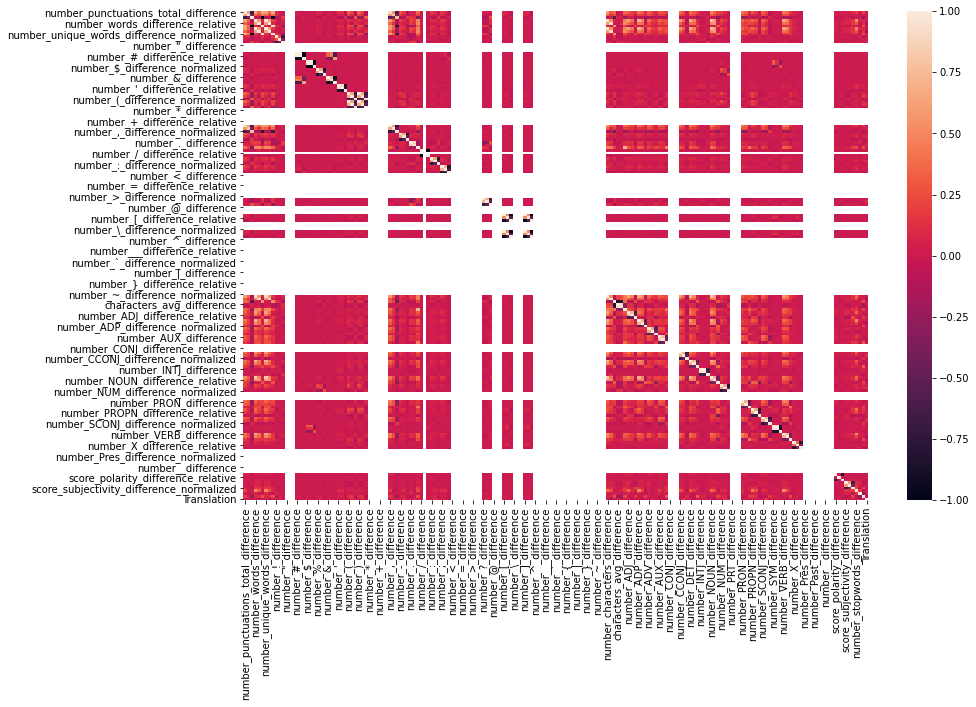

In [8]:
#look at correlation matrix
np.cov(df, bias=True)
corrMatrix=df.corr()
f=plt.figure(figsize=(14,9))
sn.heatmap(corrMatrix, annot=False)
f.show()

In [9]:
#Korrelation
correlated_features = set()
correlation_matrix = df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            print(f"The following features are correlated: {correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}. Correlation = {round(abs(correlation_matrix.iloc[i, j]),2)}")
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(f"Drop the following features: {correlated_features}")

The following features are correlated: number_words_difference_normalized and number_punctuations_total_difference_normalized. Correlation = 1.0
The following features are correlated: number_unique_words_difference and number_words_difference. Correlation = 0.99
The following features are correlated: number_unique_words_difference_relative and number_words_difference_relative. Correlation = 1.0
The following features are correlated: number_unique_words_difference_normalized and number_punctuations_total_difference_normalized. Correlation = 0.93
The following features are correlated: number_unique_words_difference_normalized and number_words_difference_normalized. Correlation = 0.93
The following features are correlated: number_#_difference_relative and number_#_difference. Correlation = 1.0
The following features are correlated: number_#_difference_normalized and number_#_difference. Correlation = 1.0
The following features are correlated: number_#_difference_normalized and number_#_di

In [10]:
#drop correlated features, but only when looking at a big dataset
df=df.drop(columns=correlated_features)

In [11]:
df

,number_punctuations_total_difference,number_punctuations_total_difference_relative,number_punctuations_total_difference_normalized,number_words_difference,number_words_difference_relative,number_!_difference,number_!_difference_relative,number_!_difference_normalized,"number_""_difference","number_""_difference_relative",...,score_polarity_difference,score_polarity_difference_relative,score_polarity_difference_normalized,score_subjectivity_difference,score_subjectivity_difference_relative,score_subjectivity_difference_normalized,number_stopwords_difference,number_stopwords_difference_relative,number_stopwords_difference_normalized,Translation
0,2,1.000000,-0.100000,1,0.100000,0,0.0,0.000000,0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-47,-1.0,3.916667,1
1,2,2.000000,-0.075758,5,0.500000,0,0.0,0.000000,0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-47,-1.0,4.272727,1
2,0,0.000000,-0.012821,-1,-0.090909,0,0.0,0.000000,0,0.0,...,-1.166667,-7.0,0.096154,-0.166667,-1.0,0.012821,-54,-1.0,4.153846,1
3,0,0.000000,0.000000,1,0.125000,0,0.0,0.000000,0,0.0,...,-0.200000,-1.0,0.025000,-0.500000,-1.0,0.062500,-56,-1.0,7.000000,1
4,0,0.000000,0.000000,-1,-0.111111,0,0.0,0.000000,0,0.0,...,0.083333,-1.0,-0.009259,-0.229167,-1.0,0.025463,-45,-1.0,5.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,1.000000,-0.042857,3,0.333333,0,0.0,0.000000,0,0.0,...,1.001852,-541.0,-0.071614,-0.196296,-1.0,0.019630,-41,-1.0,4.100000,0
19996,2,1.000000,0.103896,13,2.600000,0,0.0,0.000000,0,0.0,...,0.433333,0.0,-0.019697,0.000000,0.0,0.000000,-12,-1.0,1.714286,0
19997,-1,-0.333333,0.058824,1,0.071429,1,0.0,-0.058824,0,0.0,...,0.000000,0.0,0.000000,-0.500000,-1.0,0.029412,-46,-1.0,2.705882,0
19998,0,0.000000,0.027778,1,0.166667,0,0.0,0.000000,0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-21,-1.0,2.625000,0


## V. Train Model


### Create Train Test Split

In [12]:
target=df['Translation']
df=df.drop(columns=['Translation'])
df

,number_punctuations_total_difference,number_punctuations_total_difference_relative,number_punctuations_total_difference_normalized,number_words_difference,number_words_difference_relative,number_!_difference,number_!_difference_relative,number_!_difference_normalized,"number_""_difference","number_""_difference_relative",...,number__difference_normalized,score_polarity_difference,score_polarity_difference_relative,score_polarity_difference_normalized,score_subjectivity_difference,score_subjectivity_difference_relative,score_subjectivity_difference_normalized,number_stopwords_difference,number_stopwords_difference_relative,number_stopwords_difference_normalized
0,2,1.000000,-0.100000,1,0.100000,0,0.0,0.000000,0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-47,-1.0,3.916667
1,2,2.000000,-0.075758,5,0.500000,0,0.0,0.000000,0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-47,-1.0,4.272727
2,0,0.000000,-0.012821,-1,-0.090909,0,0.0,0.000000,0,0.0,...,0.0,-1.166667,-7.0,0.096154,-0.166667,-1.0,0.012821,-54,-1.0,4.153846
3,0,0.000000,0.000000,1,0.125000,0,0.0,0.000000,0,0.0,...,0.0,-0.200000,-1.0,0.025000,-0.500000,-1.0,0.062500,-56,-1.0,7.000000
4,0,0.000000,0.000000,-1,-0.111111,0,0.0,0.000000,0,0.0,...,0.0,0.083333,-1.0,-0.009259,-0.229167,-1.0,0.025463,-45,-1.0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,1.000000,-0.042857,3,0.333333,0,0.0,0.000000,0,0.0,...,0.0,1.001852,-541.0,-0.071614,-0.196296,-1.0,0.019630,-41,-1.0,4.100000
19996,2,1.000000,0.103896,13,2.600000,0,0.0,0.000000,0,0.0,...,0.0,0.433333,0.0,-0.019697,0.000000,0.0,0.000000,-12,-1.0,1.714286
19997,-1,-0.333333,0.058824,1,0.071429,1,0.0,-0.058824,0,0.0,...,0.0,0.000000,0.0,0.000000,-0.500000,-1.0,0.029412,-46,-1.0,2.705882
19998,0,0.000000,0.027778,1,0.166667,0,0.0,0.000000,0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-21,-1.0,2.625000


In [13]:
sum(df.isna().any())

0

In [14]:
df=df.fillna(0)

In [15]:
#scale data otherwise logistic regression does not converge
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])


In [16]:
df

,number_punctuations_total_difference,number_punctuations_total_difference_relative,number_punctuations_total_difference_normalized,number_words_difference,number_words_difference_relative,number_!_difference,number_!_difference_relative,number_!_difference_normalized,"number_""_difference","number_""_difference_relative",...,number__difference_normalized,score_polarity_difference,score_polarity_difference_relative,score_polarity_difference_normalized,score_subjectivity_difference,score_subjectivity_difference_relative,score_subjectivity_difference_normalized,number_stopwords_difference,number_stopwords_difference_relative,number_stopwords_difference_normalized
0,0.500000,0.133333,0.340000,0.520661,0.025581,0.333333,0.5,0.333333,0.0,0.0,...,0.0,0.540541,0.2,0.487805,0.500000,0.022222,0.333333,0.869806,0.0,0.163194
1,0.500000,0.200000,0.354545,0.553719,0.034884,0.333333,0.5,0.333333,0.0,0.0,...,0.0,0.540541,0.2,0.487805,0.500000,0.022222,0.333333,0.869806,0.0,0.178030
2,0.461538,0.066667,0.392308,0.504132,0.021142,0.333333,0.5,0.333333,0.0,0.0,...,0.0,0.225225,0.2,0.534709,0.416667,0.000000,0.341880,0.850416,0.0,0.173077
3,0.461538,0.066667,0.400000,0.520661,0.026163,0.333333,0.5,0.333333,0.0,0.0,...,0.0,0.486486,0.2,0.500000,0.250000,0.000000,0.375000,0.844875,0.0,0.291667
4,0.461538,0.066667,0.400000,0.504132,0.020672,0.333333,0.5,0.333333,0.0,0.0,...,0.0,0.563063,0.2,0.483288,0.385417,0.000000,0.350309,0.875346,0.0,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.480769,0.133333,0.374286,0.537190,0.031008,0.333333,0.5,0.333333,0.0,0.0,...,0.0,0.811311,0.2,0.452871,0.401852,0.000000,0.346420,0.886427,0.0,0.170833
19996,0.500000,0.133333,0.462338,0.619835,0.083721,0.333333,0.5,0.333333,0.0,0.0,...,0.0,0.657658,0.2,0.478197,0.500000,0.022222,0.333333,0.966759,0.0,0.071429
19997,0.442308,0.044444,0.435294,0.520661,0.024917,0.666667,0.5,0.294118,0.0,0.0,...,0.0,0.540541,0.2,0.487805,0.250000,0.000000,0.352941,0.872576,0.0,0.112745
19998,0.461538,0.066667,0.416667,0.520661,0.027132,0.333333,0.5,0.333333,0.0,0.0,...,0.0,0.540541,0.2,0.487805,0.500000,0.022222,0.333333,0.941828,0.0,0.109375


In [17]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    df,target,test_size=0.2, random_state = 42)

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
lr = LogisticRegression(class_weight = 'balanced', max_iter=10000).fit(data_train, target_train)
prediction = lr.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))

The Accuracy on test set: 0.7672
The F1-Score on test set: 0.7858
The Precision-Score on test set: 0.7337
The Recall-Score on test set: 0.8460


Feature: 0 number_punctuations_total_difference, Score: -1.5078004873974624
Feature: 1 number_punctuations_total_difference_relative, Score: 0.24182959476787672
Feature: 2 number_punctuations_total_difference_normalized, Score: 2.4624495750459907
Feature: 3 number_words_difference, Score: 4.421625546844528
Feature: 4 number_words_difference_relative, Score: -14.366688405872477
Feature: 5 number_!_difference, Score: 0.8985875799793317
Feature: 6 number_!_difference_relative, Score: 3.321782726780577
Feature: 7 number_!_difference_normalized, Score: 1.2297804988404393
Feature: 8 number_"_difference, Score: 0.0
Feature: 9 number_"_difference_relative, Score: 0.0
Feature: 10 number_"_difference_normalized, Score: 0.0
Feature: 11 number_#_difference, Score: -0.16699360077822145
Feature: 12 number_$_difference, Score: 0.09331937369898613
Feature: 13 number_%_difference, Score: -1.6684328523848175
Feature: 14 number_%_difference_relative, Score: 3.9970916255843743
Feature: 15 number_&_differe

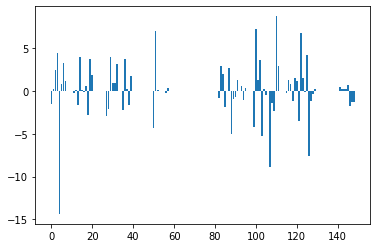

In [19]:
# feature importance
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {i} {data_train.columns[i]}, Score: {v}')

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
nb = GaussianNB().fit(data_train, target_train)
prediction = nb.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))

The Accuracy on test set: 0.7575
The F1-Score on test set: 0.7892
The Precision-Score on test set: 0.7031
The Recall-Score on test set: 0.8995


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
svc = SVC().fit(data_train, target_train)
prediction = svc.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))

The Accuracy on test set: 0.7843
The F1-Score on test set: 0.8085
The Precision-Score on test set: 0.7323
The Recall-Score on test set: 0.9024


In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
mlp = MLPClassifier().fit(data_train, target_train)
prediction = mlp.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))

The Accuracy on test set: 0.8810
The F1-Score on test set: 0.8846
The Precision-Score on test set: 0.8665
The Recall-Score on test set: 0.9034
